In [1]:
import pandas as pd
import soccerdata as sd
import warnings
import matplotlib.pyplot as plt

import sys
import os
warnings.filterwarnings("ignore")

# Add project root to Python path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from functions import *

season = ["2021-22","2022-23","2023-24","2024-25"]
fbref = sd.FBref("Big 5 European Leagues Combined", season)



[01/09/26 16:46:14] INFO     No custom team name replacements found. You can configure these in       ]8;id=604922;file://c:\Python310\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=978657;file://c:\Python310\lib\site-packages\soccerdata\_config.py#91\91]8;;\
                             C:\Users\Yassine\soccerdata\config\teamname_replacements.json.                        

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=296612;file://c:\Python310\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=293975;file://c:\Python310\lib\site-packages\soccerdata\_config.py#197\197]8;;\
                             C:\Users\Yassine\soccerdata\config\league_dict.json.                                  

[01/09/26 16:46:15] INFO     Saving cached data to C:\Users\Yassine\soccerdata\data\FBref            ]8;id=818737;file://c:\Python310\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=369501;file://c:\Python310\lib\site-packages\soccerdata\_common.py#263\263]8;;\

## Explore Data

In [5]:
#import functions from functions.py
for i in ["shooting", "passing","defense", "possession"]:
    globals()[f"{i}_df"] = read_players_data(fbref, i, "GER-Bundesliga")


shooting_cols = ['team_', 'player_', 'nation_', 'pos_', 'age_',
       '90s_', 'Standard_Gls', 'Standard_Sh', 'Standard_SoT',
       'Standard_Sh/90', 'Standard_SoT/90', 'Standard_G/Sh', 'Expected_xG',
       'Expected_G-xG', 'Expected_np:G-xG']
shooting_df = shooting_df[shooting_cols]

passing_cols = ['team_', 'player_', 'nation_', 'pos_', 'age_',
       '90s_', 'Total_Cmp', 'Total_Att','Total_TotDist', 'Total_PrgDist', 
       'Short_Cmp', 'Short_Att','Medium_Cmp', 'Medium_Att', 'Long_Cmp',
       'Long_Att', 'Ast_', 'xAG_', 'Expected_xA',
       'Expected_A-xAG', 'KP_', '1/3_', 'PPA_', 'CrsPA_', 'PrgP_']
passing_df = passing_df[passing_cols]

defense_cols = ['team_', 'player_', 'nation_', 'pos_', 'age_',
       '90s_', 'Tackles_Tkl', 'Tackles_TklW', 'Tackles_Def 3rd',
       'Tackles_Mid 3rd', 'Tackles_Att 3rd', 'Challenges_Tkl',
       'Challenges_Att', 'Challenges_Lost', 'Blocks_Blocks',
       'Blocks_Sh', 'Blocks_Pass', 'Int_', 'Clr_', 'Err_']
defense_df = defense_df[defense_cols]

possession_cols = ['team_', 'player_', 'nation_', 'pos_', 'age_',
       '90s_', 'Touches_Touches', 'Touches_Def Pen',
       'Touches_Def 3rd', 'Touches_Mid 3rd', 'Touches_Att 3rd',
       'Touches_Att Pen', 'Touches_Live', 'Take-Ons_Att', 'Take-Ons_Succ',
        'Take-Ons_Tkld', 'Carries_Carries','Carries_TotDist', 'Carries_PrgDist',
        'Carries_PrgC', 'Carries_1/3','Carries_CPA', 'Carries_Mis', 'Carries_Dis',
        'Receiving_Rec','Receiving_PrgR']
possession_df = possession_df[possession_cols]

#filter on Aymen Barkok
Barkok_shooting = shooting_df[shooting_df['player_'] == 'Aymen Barkok']
Barkok_passing = passing_df[passing_df['player_'] == 'Aymen Barkok']
#Barkok_goal_shot_creation = goal_shot_creation_df[goal_shot_creation_df['player_'] == 'Aymen Barkok']
Barkok_defense = defense_df[defense_df['player_'] == 'Aymen Barkok']
Barkok_possession = possession_df[possession_df['player_'] == 'Aymen Barkok']


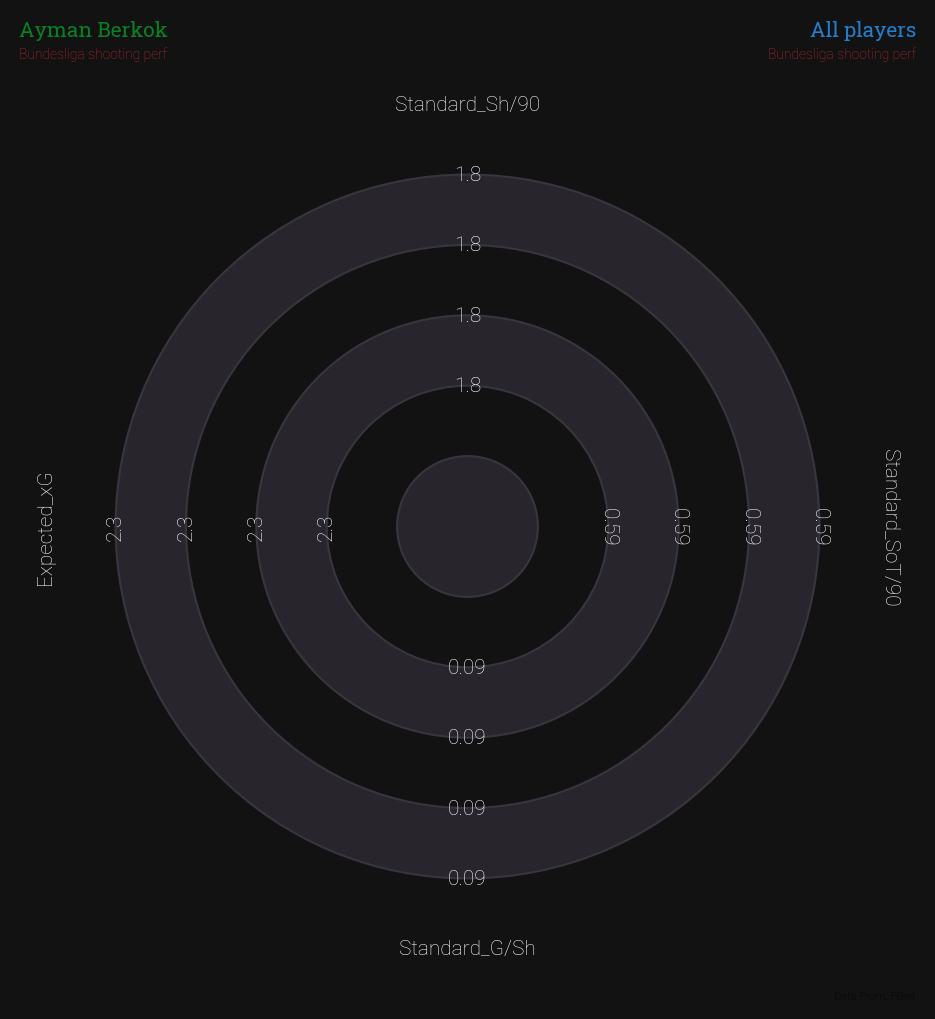

In [18]:
radar_df = Barkok_shooting[['player_','Standard_Sh/90', 'Standard_SoT/90','Standard_G/Sh', 'Expected_xG']]
radar_df.fillna(0, inplace=True) 
radar_df = radar_df.groupby('player_').mean().reset_index().drop("player_", axis=1)

all_shooting = shooting_df[(shooting_df['player_'] != 'Aymen Barkok') & (shooting_df['pos_'].isin(["MF","MF,FW","FW,MF"]))]
all_radar_df = all_shooting[['Standard_Sh/90', 'Standard_SoT/90','Standard_G/Sh', 'Expected_xG']]
#all_radar_df.fillna(0, inplace=True) 
all_radar_df = all_radar_df.mean(numeric_only=True).to_frame().T

plot_radar_chart_to_compare(radar_df, all_radar_df)

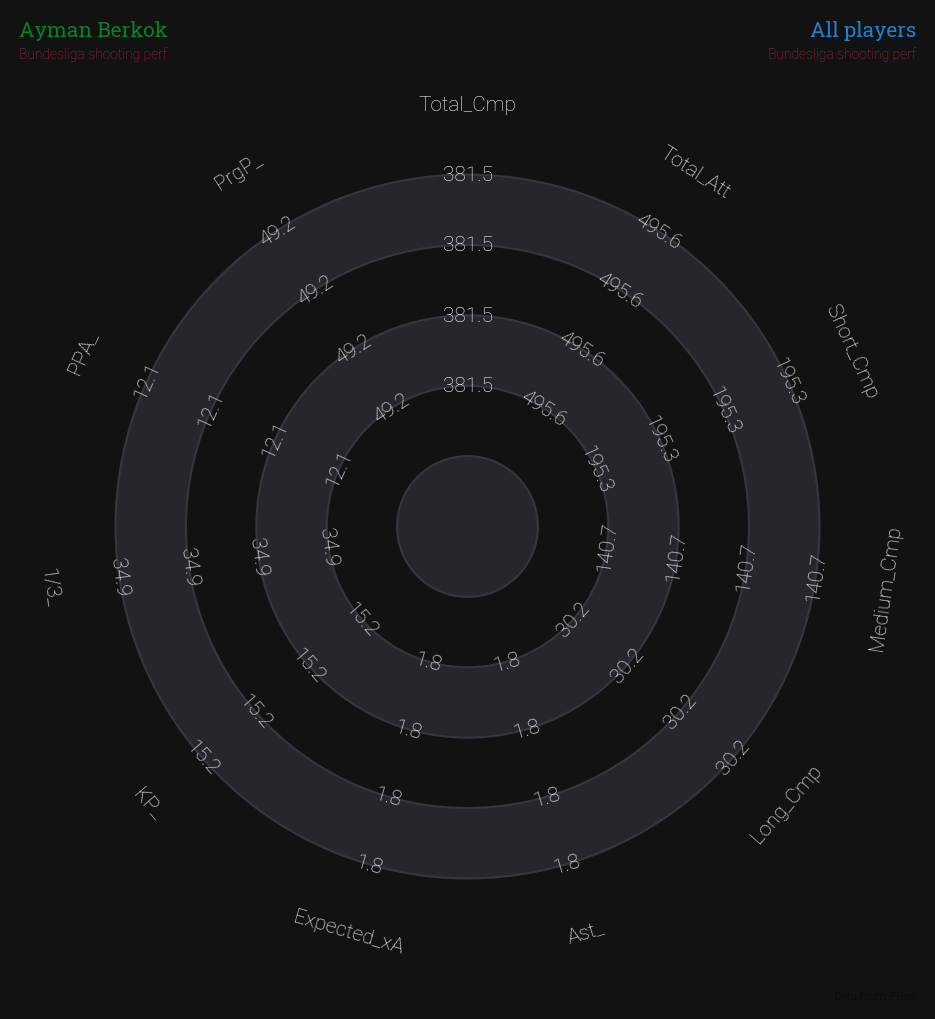

In [30]:
ayman_passing_df = Barkok_passing[['player_','Total_Cmp','Total_Att', 
       'Short_Cmp','Medium_Cmp', 'Long_Cmp','Ast_', 'Expected_xA', 'KP_', '1/3_', 'PPA_','PrgP_']]
ayman_passing_df.fillna(0, inplace=True) 
ayman_passing_df = ayman_passing_df.groupby('player_').mean().reset_index().drop("player_", axis=1)

all_passing = passing_df[(passing_df['player_'] != 'Aymen Barkok')  & (passing_df['pos_'].isin(["MF","MF,FW","FW,MF"]))]
all_passing_radar_df = all_passing[['player_','Total_Cmp','Total_Att', 
       'Short_Cmp','Medium_Cmp', 'Long_Cmp','Ast_', 'Expected_xA', 'KP_', '1/3_', 'PPA_','PrgP_']]
#all_radar_df.fillna(0, inplace=True)
all_passing_radar_df = all_passing_radar_df.mean(numeric_only=True).to_frame().T

plot_radar_chart_to_compare(ayman_passing_df, all_passing_radar_df,0,150)

In [11]:
ayman_passing_df

,Total_Cmp,Total_Att,Short_Cmp,Medium_Cmp,Long_Cmp,Ast_,Expected_xA,KP_,1/3_,PPA_,PrgP_
0,94.25,138.75,48.75,32.0,8.5,0.25,0.55,3.75,11.0,3.75,17.5


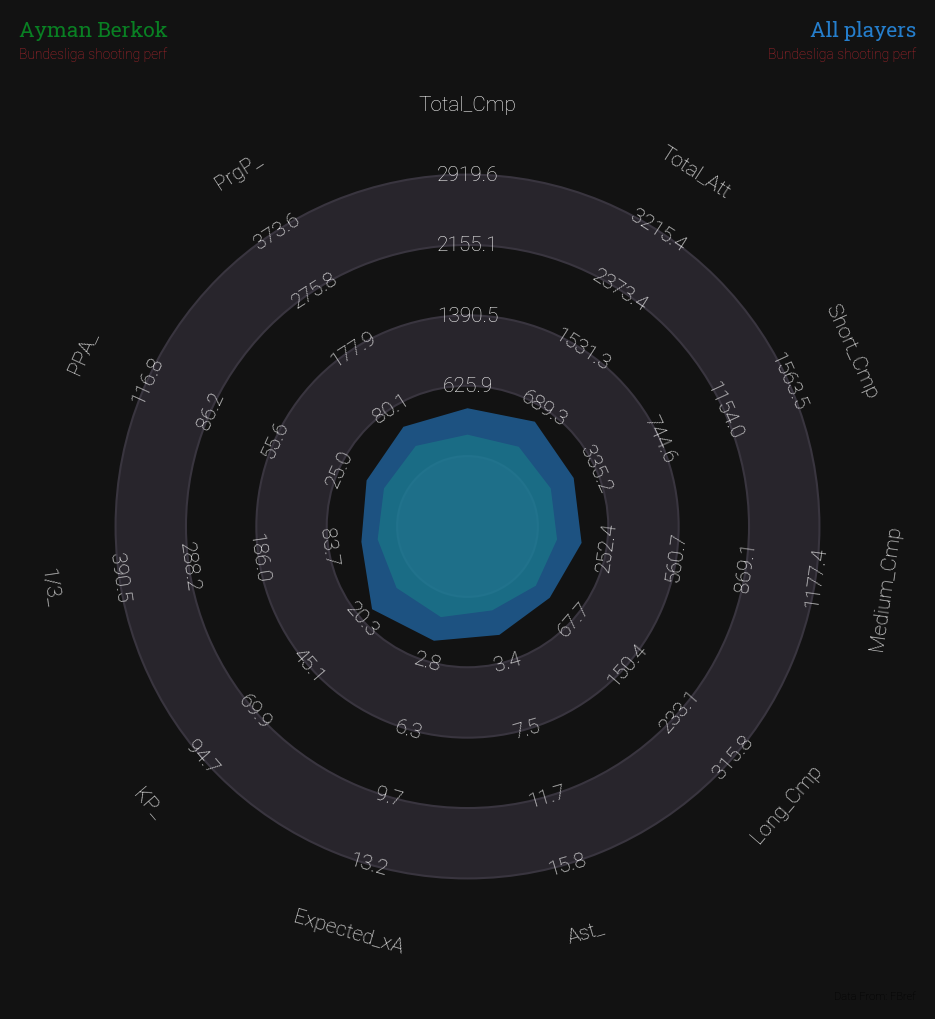

In [ ]:
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
    'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)
params = ayman_passing_df.columns.tolist()


min_range = all_passing_radar_temp[params].min().tolist()
max_range = all_passing_radar_temp[params].max().tolist()


padding = 0.05  # 5%

min_range = [
    m - padding * (M - m) for m, M in zip(min_range, max_range)
]
max_range = [
    M + padding * (M - m) for m, M in zip(min_range, max_range)
]

player1_values = ayman_passing_df.loc[0].values.tolist()
player2_values = all_passing_radar_df.loc[0].values.tolist()

radar = Radar(params, min_range, max_range)
fig, axs = grid(figheight=10, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'], facecolor='None')

rings_inner = radar.draw_circles(ax=axs['radar'],facecolor='#28252c', edgecolor='#39353f', lw=1.5)  # draw circles
radar_output = radar.draw_radar_compare(player1_values, player2_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': "#098023", 'alpha': 0.6},
                                        kwargs_compare={'facecolor': "#257ecc", 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15, color='#fcfcfc',
                                    fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15, color='#fcfcfc',
                                    fontproperties=robotto_thin.prop)

endnote_text = axs['endnote'].text(0.99, 0.5, 'Data From: FBref', fontsize=8,
                                fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Ayman Berkok', fontsize=15,
                                fontproperties=robotto_bold.prop, ha='left', va='center', color= "#098023")
title2_text = axs['title'].text(0.01, 0.25, 'Bundesliga shooting perf', fontsize=10,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#B6282F')
title3_text = axs['title'].text(0.99, 0.65, 'All players', fontsize=15,
                                fontproperties=robotto_bold.prop, ha='right', va='center', color= "#257ecc")
title4_text = axs['title'].text(0.99, 0.25, 'Bundesliga shooting perf', fontsize=10,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#B6282F')

fig.set_facecolor('#121212')

In [12]:
min_range

[89.28894472361809,
 119.6105527638191,
 47.8643216080402,
 30.972361809045225,
 6.256281407035176,
 0.39195979899497485,
 0.43216080402010043,
 3.64070351758794,
 7.658291457286432,
 3.0025125628140703,
 11.271356783919598]